# Pronóstico adaptativo

## Descripción del problema real

Los pronósticos de los precios de la electricidad en mercados liberalizados son un insumo fundamental para la toma de decisiones dentro de las organizaciones. Fundamentalmente, los pronosticos de corto plazo son utilizados en decisiones de carácter operativo. En el caso abordado, es necesario contar con los pronósticos para definir la politica de operación de una empresa del sector eléctrico.

## Descripción del problema en términos de los datos

La carpeta `datos/precios/` contiene los precios historicos horarios de la electricidad en la Bolsa de Energía del mercado eléctrico colombiano, publicados por el operador del mercado. Se desean obtener pronósticos para el precio promedio diario para los próximos siete (7) días a la fecha actual.

## Aproximaciones posibles

En este caso, se desea evaluar la capacidad de pronóstico de un ADALINE con aprendizaje en línea.

## Requerimientos

Usted debe:

* Procesar los datos históricos para conformar el conjunto de datos. Los archivos de Excel no pueden ser modificados y actualizados directamente por el operador del sistema. Su código debe leer los archivos y crear la serie de precios promedio diarios de la electricidad.


* Determinar si el modelo debe pronosticar los precios promedios sin ninguna transformación, o si la inclusión de una transformación (logaritmo natural, raíz cúbica, raíz cuadrada, etc) resulta en un incremento de la precisión del pronóstico.


* Generar el pronóstico para los precios de los próximos siete días.


* Preparar el código para que el modelo sea entrenado usando el gradiente y el momentum.


* Determinar cuál es el número óptimo de retardos (observaciones) que el modelo debe considerar hacia atrás para producir el pronóstico.


* Determinar los valores óptimos de la tasa de aprendizaje y el momentum.


## Cargar y Limpieza de Datos

Precio_Bolsa_Nacional_($kwh)_1995.xlsx
Precio_Bolsa_Nacional_($kwh)_2000.xlsx
Precio_Bolsa_Nacional_($kwh)_2008.xlsx
Precio_Bolsa_Nacional_($kwh)_2005.xlsx
Precio_Bolsa_Nacional_($kwh)_2014.xlsx
Precio_Bolsa_Nacional_($kwh)_2009.xlsx
Precio_Bolsa_Nacional_($kwh)_2011.xlsx
Precio_Bolsa_Nacional_($kwh)_2015.xlsx
Precio_Bolsa_Nacional_($kwh)_2006.xlsx
Precio_Bolsa_Nacional_($kwh)_2016.xls
Precio_Bolsa_Nacional_($kwh)_1999.xlsx
Precio_Bolsa_Nacional_($kwh)_2017.xls
Precio_Bolsa_Nacional_($kwh)_2007.xlsx
Precio_Bolsa_Nacional_($kwh)_2012.xlsx
Precio_Bolsa_Nacional_($kwh)_2002.xlsx
Precio_Bolsa_Nacional_($kwh)_2001.xlsx
Precio_Bolsa_Nacional_($kwh)_2004.xlsx
Precio_Bolsa_Nacional_($kwh)_2013.xlsx
Precio_Bolsa_Nacional_($kwh)_2018.xls
Precio_Bolsa_Nacional_($kwh)_2003.xlsx
Precio_Bolsa_Nacional_($kwh)_1997.xlsx
Precio_Bolsa_Nacional_($kwh)_2010.xlsx
Precio_Bolsa_Nacional_($kwh)_1996.xlsx
Precio_Bolsa_Nacional_($kwh)_1998.xlsx
longitud: 8486
longitud despues de eliminar na: 8405
Longitud despu

,fecha,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,promedio,year,month,day,year_month
0,1995-07-21,1.073,1.000,1.000,1.00,1.00,1.000,5.000,6.000,6.000,...,16.670,11.929,5.000,1.000,1.000,5.091783,1995,7,21,199507
1,1995-07-22,1.073,1.073,1.000,1.00,1.00,1.073,1.303,1.303,1.303,...,2.500,2.500,1.303,1.073,1.073,1.278043,1995,7,22,199507
2,1995-07-23,1.073,1.000,1.000,1.00,1.00,1.000,0.100,1.000,1.000,...,1.238,1.238,1.238,1.073,1.000,0.947870,1995,7,23,199507
3,1995-07-24,1,1.000,0.990,1.00,1.00,1.073,3.000,3.000,3.000,...,22.500,9.256,3.000,1.073,1.000,4.449652,1995,7,24,199507
4,1995-07-25,0.99,0.990,0.989,0.99,0.99,1.073,1.263,1.263,1.263,...,1.500,1.263,1.263,1.073,0.990,1.156087,1995,7,25,199507


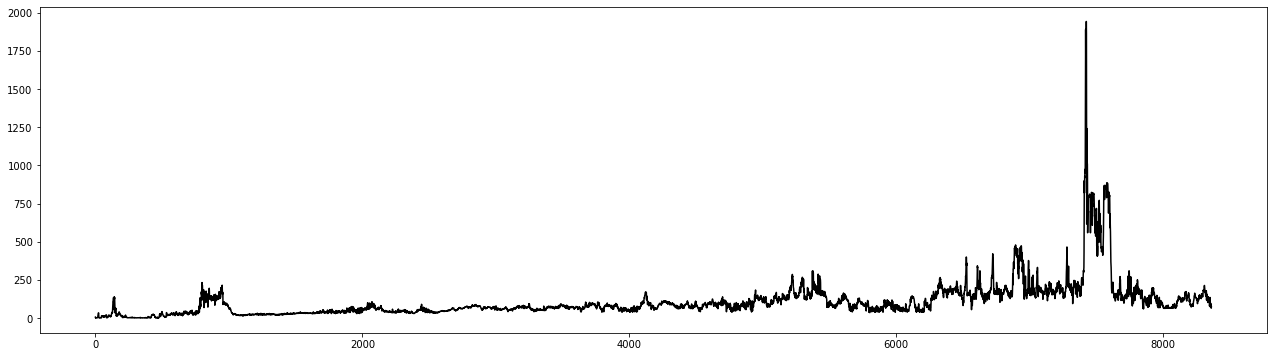

In [34]:
from os import scandir,getcwd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


DIR = 'datos/precios/'
archivos = scandir(DIR)
data = pd.DataFrame()
for archivo in archivos:
    print(archivo.name)
    auxdata = pd.read_excel(DIR + archivo.name,header=None,names=['fecha'] + [str(i)for i in range(1,25)]+['basura1']+['basura2'])
    data = pd.concat([data,auxdata])

    
data = data.drop(['basura1','basura2'],axis=1)
print('longitud:',len(data))
data = data.dropna()
print('longitud despues de eliminar na:',len(data))
data = data.drop(data[data['fecha']=='Fecha'].index)
print('Longitud despues de eliminar header fecha',len(data))
data = data.reset_index(drop=True)

#data.to_excel(DIR + 'precios.xlsx')
data['fecha']=data['fecha'].astype('datetime64[D]')

data['promedio'] = data.mean(axis=1)

data['year'] = data["fecha"].dt.strftime("%Y")
data['year'] = data['year'].astype('int')

data['month'] = data["fecha"].dt.strftime("%m")
data['month'] = data['month'].astype('int')

data['day'] = data["fecha"].dt.strftime("%d")
data['day'] = data['day'].astype('int')

data = data.sort_values(['year','month','day'],ascending = True)
data['year_month'] = data['fecha'].astype('int')
data['year_month'] = data['year']*100  + data['month']
#data.head()

plt.figure(figsize=(22,6))
plt.plot(data['promedio'].values, color='black');
data.head()


## IPC

,fecha,1,2,3,4,5,6,7,8,9,...,24,promedio,year,month,day,year_month,indice,inflacion_anual,inflacion_mensual,inflacion_año_corrido
0,1995-07-21,1.073,1.000,1.000,1.00,1.00,1.000,5.000,6.000,6.000,...,1.000,5,1995,7,21,199507,20.93,21.5,0.77,14.7
1,1995-07-22,1.073,1.073,1.000,1.00,1.00,1.073,1.303,1.303,1.303,...,1.073,1,1995,7,22,199507,20.93,21.5,0.77,14.7
2,1995-07-23,1.073,1.000,1.000,1.00,1.00,1.000,0.100,1.000,1.000,...,1.000,0,1995,7,23,199507,20.93,21.5,0.77,14.7
3,1995-07-24,1,1.000,0.990,1.00,1.00,1.073,3.000,3.000,3.000,...,1.000,4,1995,7,24,199507,20.93,21.5,0.77,14.7
4,1995-07-25,0.99,0.990,0.989,0.99,0.99,1.073,1.263,1.263,1.263,...,0.990,1,1995,7,25,199507,20.93,21.5,0.77,14.7


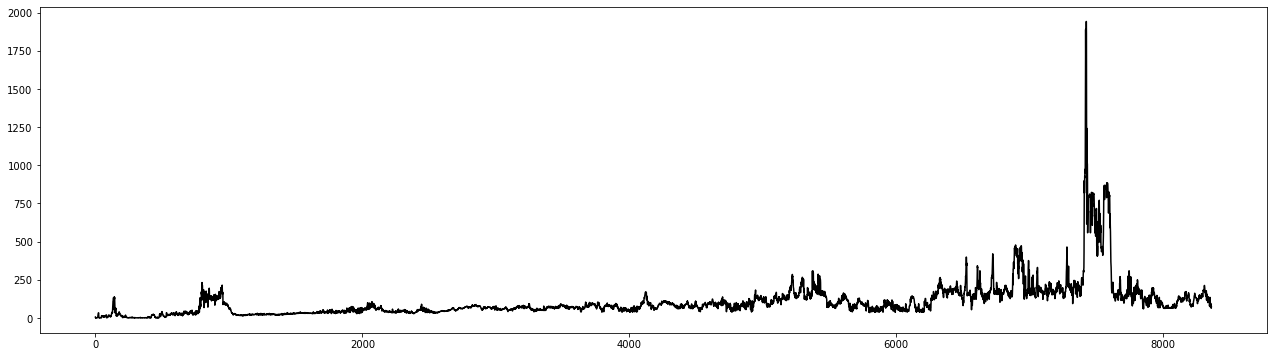

In [35]:
data_ipc = pd.read_excel('datos/ipc.xlsx',names=['fecha','indice','inflacion_anual','inflacion_mensual','inflacion_año_corrido'])
data_ipc = data_ipc.dropna()
data_ipc = data_ipc.drop(11)
data_ipc = data_ipc.sort_values(['fecha'],ascending = True)
data_ipc = data_ipc.reset_index(drop=True)
data_ipc['fecha'] = data_ipc['fecha'].astype('str')
data_ipc['year_month'] = data_ipc['fecha'].astype('int')
data_ipc = data_ipc.drop(['fecha'],axis=1)

data = pd.merge(data,data_ipc,on='year_month')
ipc_base = data['indice']
data['promedio'] = data['promedio']*ipc_base / data['indice']
data['promedio'] = data['promedio'].astype('int')

plt.figure(figsize=(22,6))
plt.plot(data['promedio'].values, color='black');
data.head()

In [36]:
base_data = data
base_data.head()

,fecha,1,2,3,4,5,6,7,8,9,...,24,promedio,year,month,day,year_month,indice,inflacion_anual,inflacion_mensual,inflacion_año_corrido
0,1995-07-21,1.073,1.000,1.000,1.00,1.00,1.000,5.000,6.000,6.000,...,1.000,5,1995,7,21,199507,20.93,21.5,0.77,14.7
1,1995-07-22,1.073,1.073,1.000,1.00,1.00,1.073,1.303,1.303,1.303,...,1.073,1,1995,7,22,199507,20.93,21.5,0.77,14.7
2,1995-07-23,1.073,1.000,1.000,1.00,1.00,1.000,0.100,1.000,1.000,...,1.000,0,1995,7,23,199507,20.93,21.5,0.77,14.7
3,1995-07-24,1,1.000,0.990,1.00,1.00,1.073,3.000,3.000,3.000,...,1.000,4,1995,7,24,199507,20.93,21.5,0.77,14.7
4,1995-07-25,0.99,0.990,0.989,0.99,0.99,1.073,1.263,1.263,1.263,...,0.990,1,1995,7,25,199507,20.93,21.5,0.77,14.7


## Implementación del Modelo

In [21]:
import numpy as np
import math
class Adaline:
    def __init__(self,
                 learning_rate=0.001, # tasa de aprendizaje
                 max_epochs=100,      # número máximo de iteraciones sobre el set de datos
                 shuffle=False,       # mezcla patrones para aprendizaje online
                 random_state=None,   #
                 warm_start=False):   #

        self.learning_rate = learning_rate
        self.max_epochs = max_epochs
        self.shuffle = shuffle
        self.random_state = random_state
        self.warm_start = warm_start
        self.coef_ = None
        self.intercept_ = None

    def fit(self, X, y):

        if not isinstance(X, np.ndarray):
            X = np.array(X)
        if not isinstance(y, np.ndarray):
            d = np.array(y)
        else:
            d = y.copy()

        if self.random_state is not None:
            np.random.RandomState(self.random_state)

        if self.coef_ is None or self.warm_start is False:
            self.coef_ = np.random.uniform(-1, 1, X.shape[1])

        if self.intercept_ is None  or self.warm_start is False:
            self.intercept_ = np.random.uniform(-1, 1, 1)

        errors2 = []
        forecasts = []

        for epoch in range(self.max_epochs):

            if self.shuffle is True:
                n = list(range(X.shape[0]))
                np.random.shuffle(n)
                X = X[n,:]
                d = d[n]

            for i in range(X.shape[0]):
                u = np.dot(X[i,:], self.coef_) + self.intercept_
                e = (d[i] - u)[0]
                self.coef_ += 2 * self.learning_rate * e * X[i,:]
                self.intercept_ += 2 * self.learning_rate * e
                errors2.append(e**2)
                forecasts.append(u)

        return errors2, forecasts

    def predict(self, X):
        if not isinstance(X, np.ndarray):
            X = np.array(X)
        u = np.dot(X, self.coef_) + self.intercept_
        return u

## Procesamiento de Datos

In [32]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


data = base_data['promedio'].astype('int')
data = np.array(data.values)

In [33]:
data

array([ 5,  1,  0, ..., 71, 64, 73])

Varianza : 54.90990715233141
Varianza Logaritmica: nan
Varianza raiz cuadrada: 0.059766045679202164
Varianza raiz cubica: 0.05843003888236789


/home/andres/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
/home/andres/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:117: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


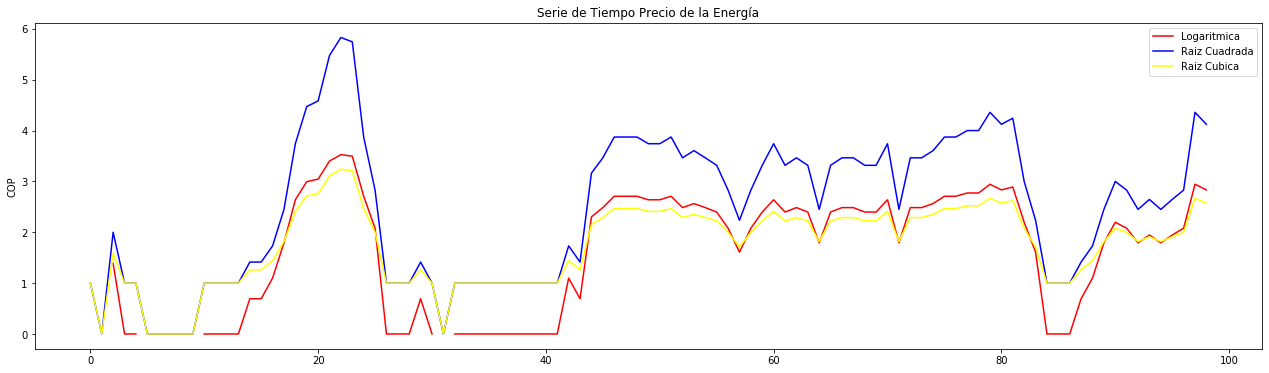

In [49]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


data = base_data['promedio'][1:100]
data = np.array(data.values)
print('Varianza :',np.var(data))

#Logaritmica
log = np.log(data)
print('Varianza Logaritmica:',np.var(log/log.max()))

#Raiz cuadrada
rai2 = np.sqrt(data)
print('Varianza raiz cuadrada:',np.var(rai2/rai2.max()))

#Raiz cubica
rai3 = np.power(data,1/3)
print('Varianza raiz cubica:',np.var(rai3/rai3.max()))




plt.figure(figsize=(22,6))
plt.title('Serie de Tiempo Precio de la Energía')
plt.ylabel('COP')
#plt.plot(data, color='black',label='Original')
plt.plot(log, color='red',label='Logaritmica')
plt.plot(rai2, color='blue',label='Raiz Cuadrada')
plt.plot(rai3, color='yellow',label='Raiz Cubica')
plt.legend()
plt.show()

In [ ]:
#Normalizamos los datos
rango = max(data)-min(data)
d =  [(i-min(data))/rango for i in data]
d = np.sqrt(data)

## Especificacion del modelo 

## Entrenamiento del modelo 

## Resultados

C:\Users\ANDORREG\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:53: RuntimeWarning: overflow encountered in double_scalars
C:\Users\ANDORREG\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: invalid value encountered in add
C:\Users\ANDORREG\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:52: RuntimeWarning: invalid value encountered in add


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

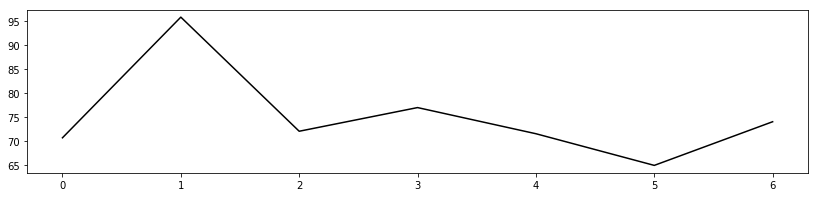

In [74]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
%matplotlib inline

##
##  Para pronosticar el valor actual se toman los `L`
##  valores previos de la serie
##
L = 8

##
## Forma la matriz X
##
X = []
for t in range(L, len(d)):
    X.append(d[t-L:t].copy())


adaline = Adaline(
    learning_rate=0.05,  # tasa de aprendizaje
    max_epochs=1,        # número máximo de iteraciones sobre el set de datos
    shuffle=False,       # mezcla patrones para aprendizaje online
    random_state=123,    # corrida reproducible
    warm_start=False)    # inicia con pesos aleatorios

errors2, forecasts = adaline.fit(
    X,
    d[L:])

len_test = 7
test = data[len(data)-len_test:len(data)]
predict =forecasts[len(forecasts)-len_test:len(forecasts)]
predcit = [i*sum(data) for i in data]

#Transformada inversa
predict = np.power(predict,2)
#Desnormalizamos
predict =  [(i*rango)+min(data) for i in predict]



plt.figure(figsize=(14,3))
plt.plot(test, color='black');
plt.plot(predict, color = 'red');

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(test, predict)
mse = mean_squared_error(test, predict)

print('Error Medio Cuadratico',mse)
print('Error Medio Cuadratico',mae)